<h1><center>Simple Linear Regression</center></h1>
<h2> Author: Mg. Ruben Quispe</h1> 

<h4>About this Notebook</h4>
En este Jupyter Notebook, aprendemos cómo usar scikit-learn para implementar una regresión lineal simple. Descargamos un conjunto de datos que está relacionado con el consumo de combustible y la emisión de dióxido de carbono de los automóviles. Luego, dividimos nuestros datos en conjuntos de entrenamiento y prueba, creamos un modelo usando el conjunto de entrenamiento, evaluamos su modelo usando el conjunto de prueba y finalmente usamos el modelo para predecir un valor desconocido.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding_data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the data in</a></li>
        <li><a href="#data_exploration">Data Exploration</a></li>
        <li><a href="#simple_regression">Simple Regression Model</a></li>
    </ol>
</div>
<br>
<hr>

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd # para trabajarr con dataframe
import pylab as pl
import numpy as np
%matplotlib inline 

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-05-21 13:05:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70%  257K 0s
    50K .......... ..........                                 100% 13.6M=0.2s

2020-05-21 13:05:33 (362 KB/s) - 'FuelConsumption.csv' saved [72629/72629]




<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
Hemos descargado un conjunto de datos de consumo de combustible, **FuelConsumption.csv**, que contiene clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para nuevos vehículos ligeros para la venta minorista en Canadá [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


we can plot each of these features:

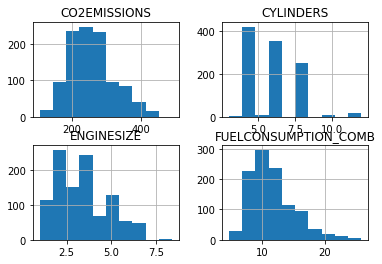

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:
Ahora, grafiquemos cada una de estas características frente a la Emisión, para ver qué tan lineal es su relación:

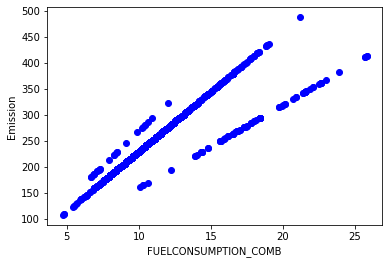

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

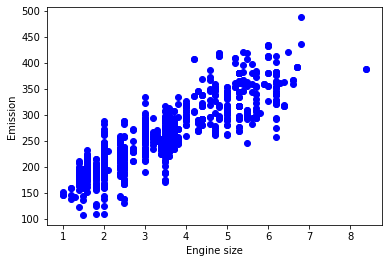

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice
plot __CYLINDER__ vs the Emission, to see how linear is their relation:

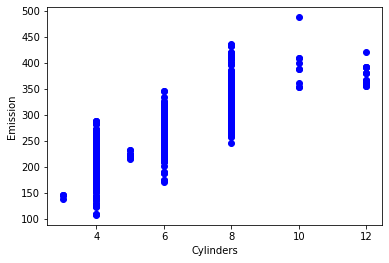

In [9]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

Double-click __here__ for the solution.

<!-- Your answer is below:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->

#### Creating train and test dataset
La división de train / test implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba, respectivamente, que son mutuamente excluyentes. Después de lo cual, entrena con el conjunto de entrenamiento y prueba con el conjunto de prueba. Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra porque el conjunto de datos de prueba no es parte del conjunto de datos que se ha utilizado para entrenar los datos. Es más realista para los problemas del mundo real.

Esto significa que conocemos el resultado de cada punto de datos en este conjunto de datos, ¡por lo que es genial probarlo! Y dado que estos datos no se han utilizado para entrenar el modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Entonces, en esencia, es realmente una prueba fuera de muestra.

Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y prueba, el 80% de los datos completos para trainning y el 20% para testing. Creamos una máscara para seleccionar filas aleatorias usando la función  __np.random.rand()__: 

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Train data distribution

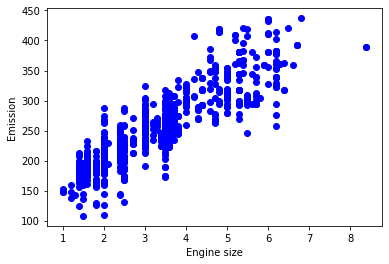

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.44085421]]
Intercept:  [124.43791584]


Como se mencionó anteriormente, __Coeficiente e Intercepción__ en la regresión lineal simple, son los parámetros de la línea de ajuste. Dado que es una regresión lineal simple, con solo 2 parámetros, y sabiendo que los parámetros son la intersección y la pendiente de la línea, sklearn puede estimarlos directamente a partir de nuestros datos. Tenga en cuenta que todos los datos deben estar disponibles para atravesar y calcular los parámetros.


#### Plot outputs

we can plot the fit line over the data:
podemos trazar la línea de ajuste sobre los datos:

Text(0, 0.5, 'Emission')

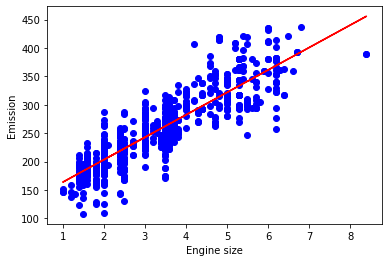

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
comparamos los valores reales y los valores pronosticados para calcular la precisión de un modelo de regresión. Las métricas de evaluación proporcionan un papel clave en el desarrollo de un modelo, ya que proporcionan información sobre las áreas que requieren mejoras.

Existen diferentes métricas de evaluación del modelo, usemos MSE aquí para calcular la precisión de nuestro modelo en función del conjunto de pruebas:

1. Mean absolute error-Error absoluto medio: es la media del valor absoluto de los errores. Esta es la métrica más fácil de entender, ya que es solo un error promedio.
2. (MSE Mean Squared Error): El error medio al cuadrado (MSE) es la media del error al cuadrado. Es más popular que el error absoluto medio porque el enfoque se orienta más hacia errores grandes. Esto se debe a que el término cuadrado aumenta exponencialmente los errores más grandes en comparación con los más pequeños.
3. Error cuadrático medio de raíz (RMSE-Root Mean Squared Error): esta es la raíz cuadrada del error cuadrático medio.
4. R-Squared no es un error, pero es una métrica popular para la precisión de su modelo. Representa lo cerca que están los datos de la línea de regresión ajustada. Cuanto más alto sea el R cuadrado, mejor se ajustará el modelo a sus datos. La mejor puntuación posible es 1.0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor).

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 26.05
Residual sum of squares (MSE): 1113.99
R2-score: 0.65


# Gracias